
# **1. Business Understanding**

### **1.1 Background**

A SYN Flood attack is a type of Distributed Denial-of-Service (DDoS) attack that exploits the TCP three-way handshake. In this attack, the adversary sends a large number of TCP SYN (synchronization) requests to a target server but deliberately does not respond to the SYN-ACK reply from the server. This leaves the server with numerous half-open connections, consuming memory and CPU resources, and eventually making the service unavailable to legitimate users.

Given the increasing reliance on online services, cloud infrastructures, and real-time communication, SYN Flood attacks represent a serious threat to business continuity, financial systems, and national security. Traditional signature-based Intrusion Detection Systems (IDS) often fail to adapt to evolving attack strategies, hence the growing need for **machine learning (ML) models** that can automatically learn traffic patterns and detect malicious behavior.

---

### **1.2 Problem Statement**

The challenge is to accurately detect SYN Flood attacks in network traffic in real-time, while minimizing false positives (legitimate traffic flagged as malicious) and false negatives (attacks missed by the model). Current approaches are limited by rigid rule-based detection, lack of generalization, and poor interpretability.

---

### **1.3 Business Goal**

The primary goal of this project is to build and evaluate machine learning models that can:

1. Reliably distinguish between **normal traffic** and **SYN Flood attacks**.
2. Identify which **traffic features** (e.g., SYN/ACK ratios, connection attempts, packet sizes) are most critical in predicting attacks.
3. Provide insights that can improve **network security strategies** and support real-time Intrusion Detection Systems (IDS).

---

### **1.4 Project Objectives**

1. **Build Models** → Train multiple ML models (e.g., Logistic Regression, Random Forest, XGBoost, Neural Networks) to classify traffic as normal or SYN Flood.
2. **Evaluate Models** → Compare them using performance metrics such as Accuracy, Precision, Recall, F1-score, and ROC-AUC.
3. **Feature Importance** → Identify and interpret the most important features in the best-performing model to guide future IDS design.

---

### **1.5 Success Criteria**

* **Technical Success:**

  * Achieve at least **95% accuracy** with **Recall above 90%** (to minimize undetected SYN Flood attacks).
  * Ensure models generalize well on unseen data.

* **Business Success:**

  * Provide actionable insights to network administrators on which features are most critical in detecting SYN Floods.
  * Contribute towards the development of a **scalable and interpretable ML-based IDS** for real-world deployment.



# **2. Data Understanding**



In [1]:
# ==========================================
# 1. Basic Data Handling & Manipulation
# ==========================================
import numpy as np
import pandas as pd

# ==========================================
# 2. Data Visualization
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns

# For advanced model interpretability
import shap

# ==========================================
# 3. Preprocessing & Data Preparation
# ==========================================
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # Handling class imbalance

# ==========================================
# 4. Machine Learning Models
# ==========================================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# ==========================================
# 5. Model Evaluation
# ==========================================
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    classification_report
)

# ==========================================
# 6. Model Tuning
# ==========================================
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# ==========================================
# 7. Utilities
# ==========================================
import warnings
warnings.filterwarnings('ignore')


c:\Users\P.acquahrockson\OneDrive - halges\desktop\ddos\venve\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# import datasets
df=pd.read_csv('../data/output.csv')
df.head(20)

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,48,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
1,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
2,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
3,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
4,17,1,2,0,2896.0,0.0,1448.0,1448.0,1448.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
5,17,1,2,0,2736.0,0.0,1368.0,1368.0,1368.0,0.0,...,1472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
6,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
7,17,232,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
8,17,1,2,0,2896.0,0.0,1448.0,1448.0,1448.0,0.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
9,17,11,2,0,2896.0,0.0,1448.0,1448.0,1448.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS


In [3]:
df.shape

(6703, 78)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6703 entries, 0 to 6702
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Protocol                  6703 non-null   int64  
 1   Flow Duration             6703 non-null   int64  
 2   Total Fwd Packets         6703 non-null   int64  
 3   Total Backward Packets    6703 non-null   int64  
 4   Fwd Packets Length Total  6703 non-null   float64
 5   Bwd Packets Length Total  6703 non-null   float64
 6   Fwd Packet Length Max     6703 non-null   float64
 7   Fwd Packet Length Min     6703 non-null   float64
 8   Fwd Packet Length Mean    6703 non-null   float64
 9   Fwd Packet Length Std     6703 non-null   float64
 10  Bwd Packet Length Max     6703 non-null   float64
 11  Bwd Packet Length Min     6703 non-null   float64
 12  Bwd Packet Length Mean    6703 non-null   float64
 13  Bwd Packet Length Std     6703 non-null   float64
 14  Flow Byt


## 🔎 Insights from `df.info()`

1. **Dataset Size**

* Rows: `6703`
* Columns: `78`


2. **Feature Types**

* **45 float64 features** → continuous values (e.g., packet length, IAT times, bytes/s).
* **32 int64 features** → counts/flags (e.g., SYN Flag Count, Total Packets).
* **1 object feature** → `"Label"` (target variable, categorical).

👉 This means **all predictors are numeric**, and only the label is categorical. Good for ML models!

---

3. **Data Completeness**

* No missing values (`Non-Null Count` = 6703 for all).
* No NaNs detected here — 👍 but we should still check later (`df.isnull().sum().sum()`).

---

4. **Key Features for SYN Flood detection**
   Some columns directly relate to TCP attacks:

* `SYN Flag Count`
* `ACK Flag Count`
* `FIN Flag Count`
* `Flow Duration`
* `Total Fwd Packets` & `Total Backward Packets`
* `Fwd Packets/s`, `Bwd Packets/s`
* `Idle Times`

👉 SYN Flood attacks usually mean:

* Very high `SYN Flag Count`
* Very low `ACK Flag Count`
* Short `Flow Duration`
* Many incomplete connections



In [5]:
## Label Distribution
df['Label'].value_counts()



Label
DrDoS_DNS    3669
Benign       3034
Name: count, dtype: int64

In [6]:
df['Label'].value_counts(normalize=True)  # percentages

Label
DrDoS_DNS    0.547367
Benign       0.452633
Name: proportion, dtype: float64

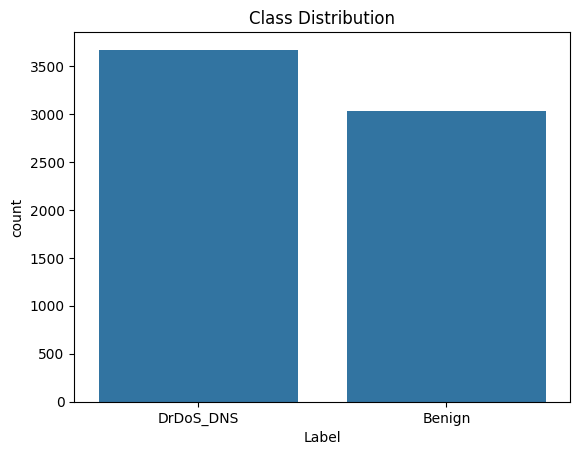

In [7]:
sns.countplot(x='Label', data=df)
plt.title("Class Distribution")
plt.show()

In [8]:
# 4. Summary statistics
# -------------------------------
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,6703.000000,6.703000e+03,6703.000000,6703.000000,6.703000e+03,6.703000e+03,6703.000000,6703.000000,6703.000000,6703.000000,...,6703.000000,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03,6.703000e+03
mean,13.825302,4.408433e+06,7.896464,4.509324,6.072777e+03,4.959965e+03,619.654036,556.014919,568.574474,18.800081,...,5.030434,-2.843068e+07,3.643757e+04,7.590772e+03,4.712779e+04,3.157412e+04,1.575373e+06,7.806843e+04,1.640308e+06,1.508151e+06
std,5.085899,1.988634e+07,90.663250,80.574949,2.267235e+05,1.880782e+05,800.769721,630.355276,623.797414,91.294982,...,81.627561,1.717053e+08,3.799835e+05,1.226665e+05,4.406432e+05,3.514015e+05,8.449426e+06,1.248229e+06,8.776632e+06,8.240104e+06
min,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000,2.000000e+00,2.000000,0.000000,7.400000e+01,0.000000e+00,37.000000,0.000000,31.000000,0.000000,...,1.000000,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,17.000000,4.800000e+01,2.000000,0.000000,7.620000e+02,0.000000e+00,362.000000,180.000000,238.608690,0.000000,...,1.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,17.000000,2.086350e+04,2.000000,2.000000,2.896000e+03,7.200000e+01,1434.000000,1424.000000,1424.000000,0.000000,...,1.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,17.000000,1.199810e+08,5063.000000,4602.000000,1.526642e+07,1.099376e+07,32120.000000,2020.000000,3015.290500,2221.556200,...,5043.000000,1.480000e+03,9.218128e+06,7.531216e+06,1.280159e+07,6.342870e+06,8.421053e+07,6.600292e+07,1.037700e+08,8.421053e+07


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Protocol,6703.0,1.382530e+01,5.085899e+00,0.0,6.0,17.0,17.0,17.0
Flow Duration,6703.0,4.408433e+06,1.988634e+07,1.0,2.0,48.0,20863.5,119981035.0
Total Fwd Packets,6703.0,7.896464e+00,9.066325e+01,1.0,2.0,2.0,2.0,5063.0
Total Backward Packets,6703.0,4.509324e+00,8.057495e+01,0.0,0.0,0.0,2.0,4602.0
Fwd Packets Length Total,6703.0,6.072777e+03,2.267235e+05,0.0,74.0,762.0,2896.0,15266416.0
...,...,...,...,...,...,...,...,...
Active Min,6703.0,3.157412e+04,3.514015e+05,0.0,0.0,0.0,0.0,6342870.0
Idle Mean,6703.0,1.575373e+06,8.449426e+06,0.0,0.0,0.0,0.0,84210530.0
Idle Std,6703.0,7.806843e+04,1.248229e+06,0.0,0.0,0.0,0.0,66002916.0
Idle Max,6703.0,1.640308e+06,8.776632e+06,0.0,0.0,0.0,0.0,103769960.0


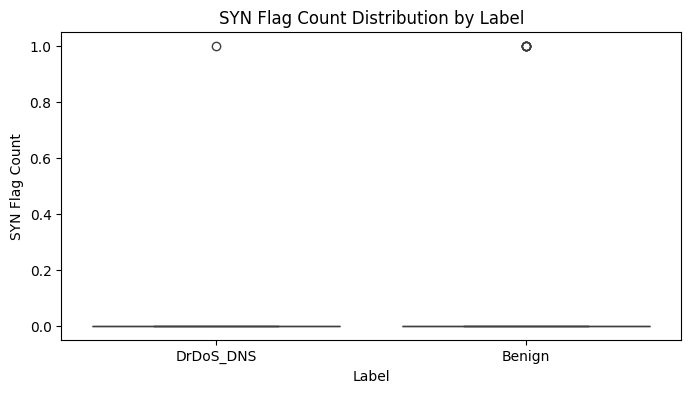

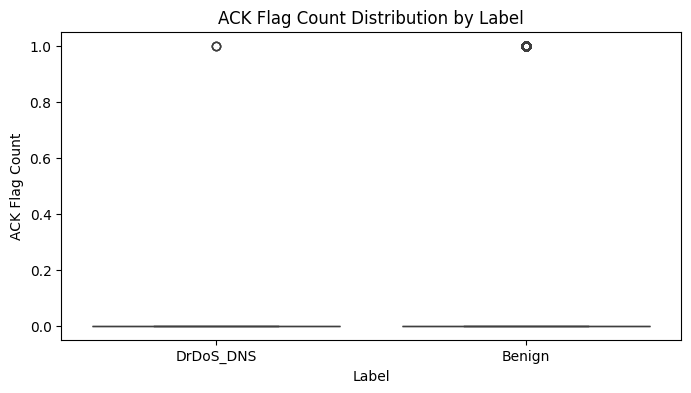

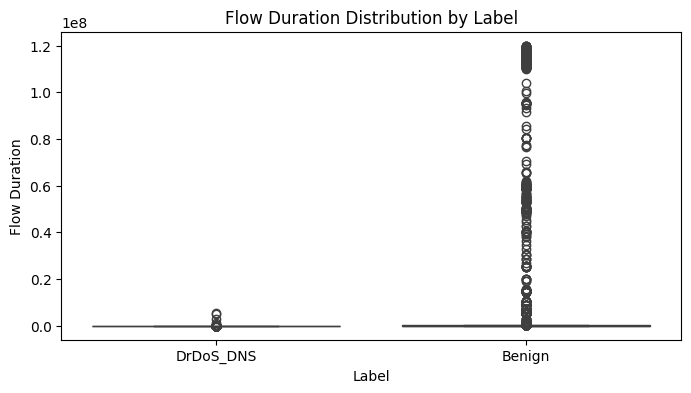

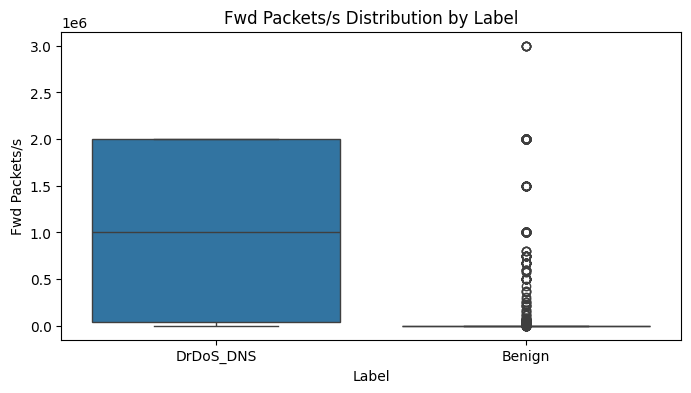

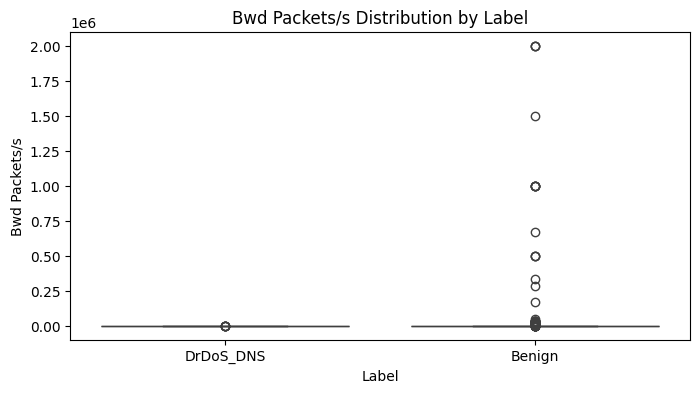

In [10]:
#  Feature distributions by label
# -------------------------------
features_to_check = [
    'SYN Flag Count', 
    'ACK Flag Count', 
    'Flow Duration', 
    'Fwd Packets/s', 
    'Bwd Packets/s'
]

for feature in features_to_check:
    if feature in df.columns:   # avoid errors if column missing
        plt.figure(figsize=(8,4))
        sns.boxplot(x='Label', y=feature, data=df)
        plt.title(f'{feature} Distribution by Label')
        plt.show()

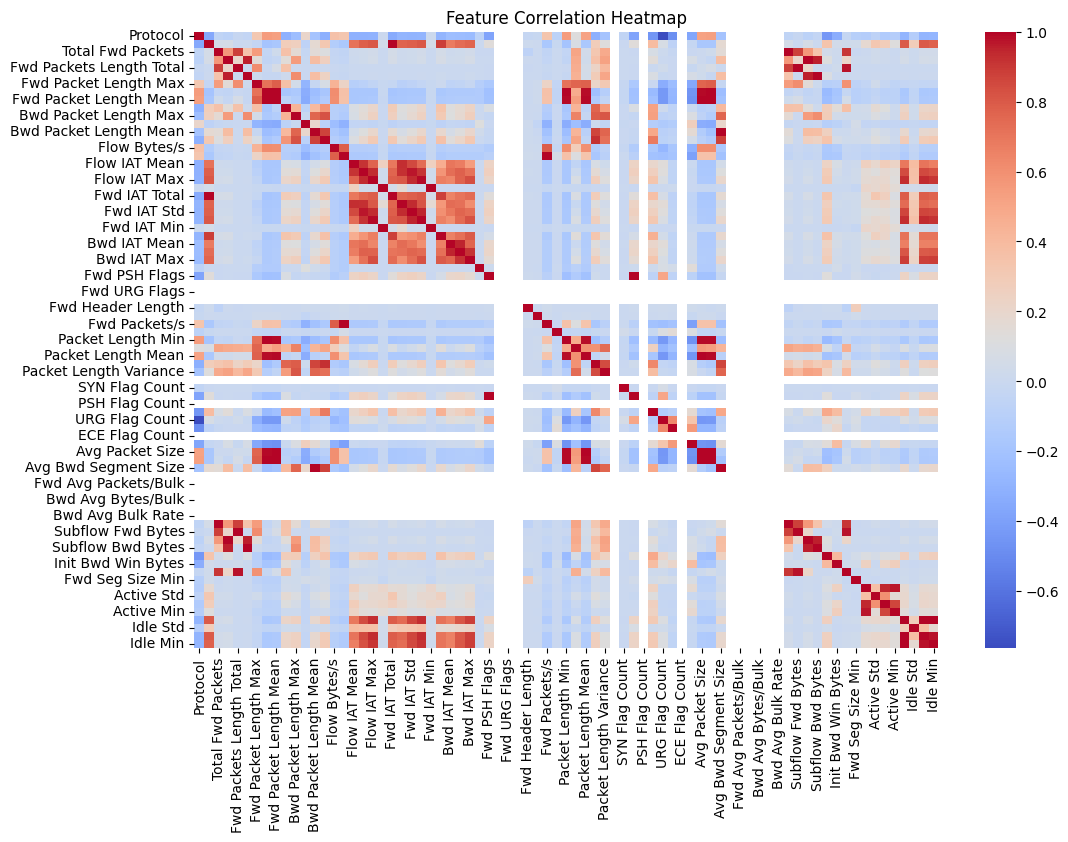

In [11]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False, cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()


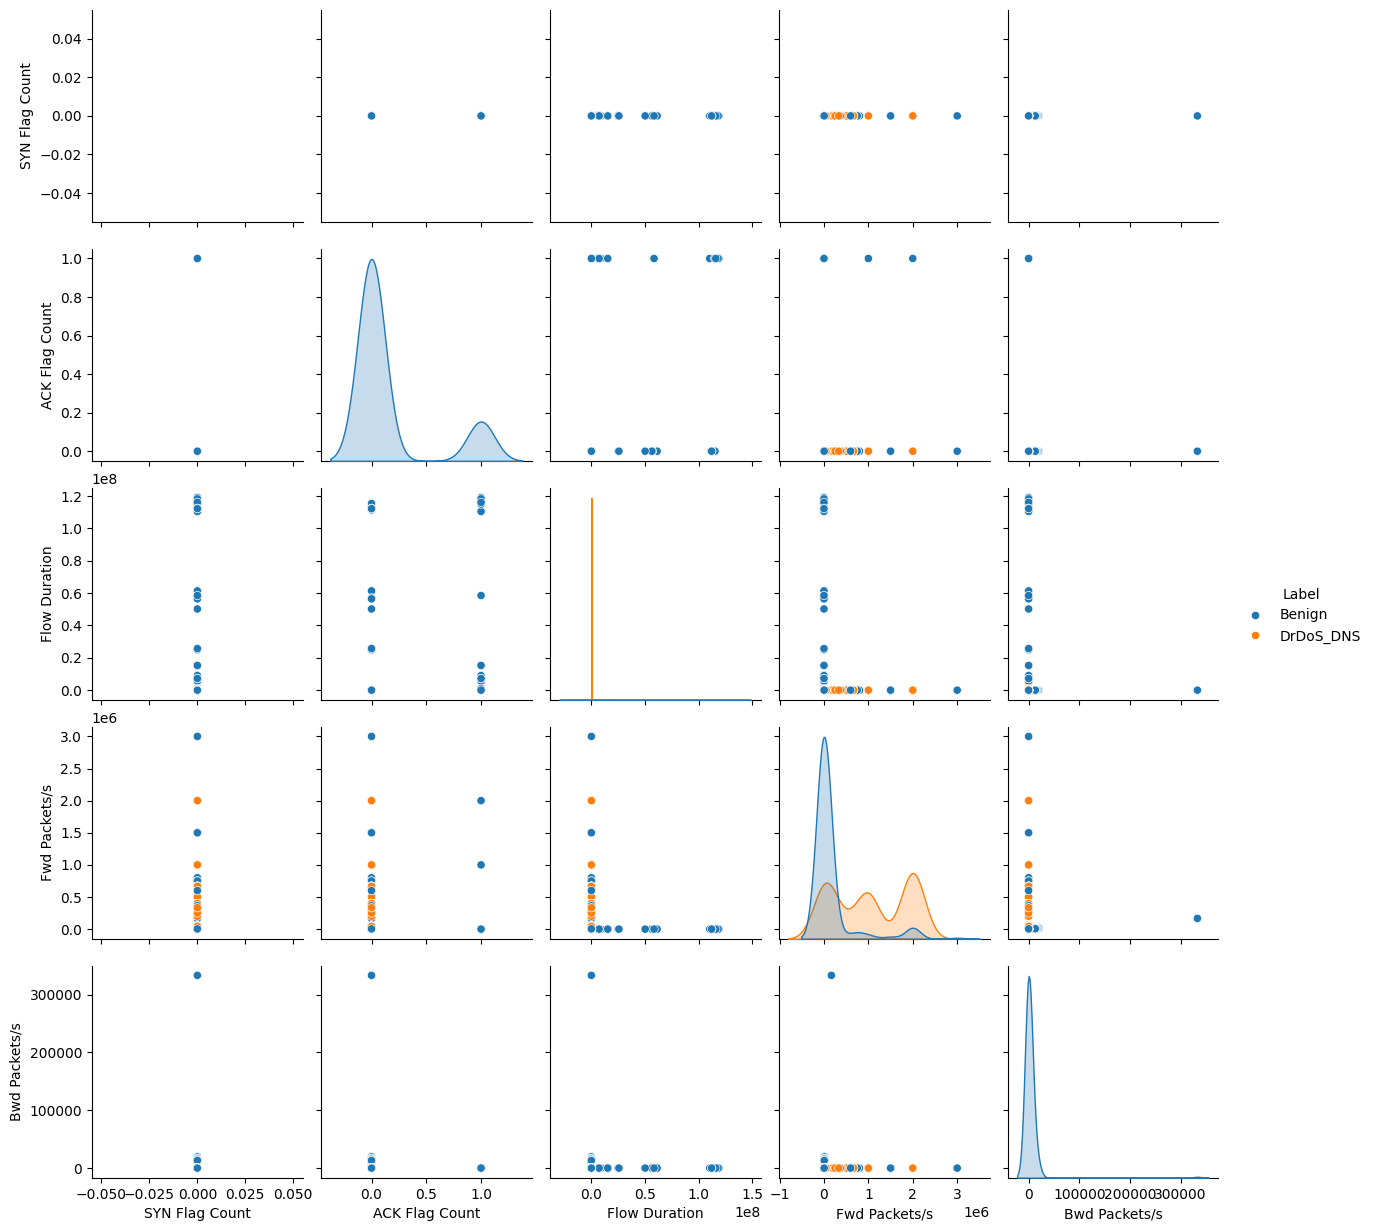

In [12]:
#  Pairwise relationships (optional)
# -------------------------------
sampled_df = df.sample(500, random_state=42)  # sample for readability
sns.pairplot(sampled_df[features_to_check + ['Label']], hue='Label', diag_kind='kde')
plt.show()

### 🔎 1. Correlation Heatmap


* **High positive correlations (dark red blocks):**

  * `Fwd Packet Length Total`, `Fwd Packet Length Mean`, `Avg Fwd Segment Size` → highly related (all describe forward packet sizes).
  * `Bwd Packets Length` variables also strongly correlated.
  * `Packet Length Mean`, `Avg Packet Size`, and `Flow Bytes/s` are closely related.

* **Implication:**
  Many features are redundant. Later (in **Feature Engineering**), we can remove or reduce multicollinearity with **PCA** or **feature selection** to avoid overfitting.

---

### 🔎 2. Pairplot (selected features vs Label)


* **SYN Flag Count & ACK Flag Count:**

  * Benign traffic has some ACK flags, but SYN flag is mostly 0.
  * SYN Flood attacks (DrDoS\_DNS) show very **different flag patterns**, especially spikes in SYN activity.
  * This means **flags are very strong features**.

* **Flow Duration:**

  * Attacks tend to have **shorter/more uniform durations**.
  * Benign flows are spread out more.

* **Fwd Packets/s and Bwd Packets/s:**

  * Attack traffic often generates **huge forward packet rates**.
  * Benign traffic is more balanced.

* **Distributions:**

  * Orange (DrDoS\_DNS) often clusters differently than blue (Benign), especially on packet-related features → good signs that ML models can separate them.

---

✅ **Summary of Data Understanding so far:**

1. Dataset has **6703 flows**, balanced between Benign (3034) and DrDoS\_DNS (3669).
2. No missing values, all features are numeric except the label.
3. **High correlations** exist → we’ll need feature reduction.
4. Key discriminative features: **SYN/ACK Flags, Flow Duration, Fwd Packets/s, Bwd Packets/s, Packet Length stats**.
5. Data seems **linearly and nonlinearly separable**, meaning we can try both tree-based (Random Forest, XGBoost) and linear models (Logistic Regression, SVM).




# Data Preprocessing

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Encode the target column
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])  
# Benign -> 0, DrDoS_DNS -> 1

# 2. Drop highly correlated features (optional, but helps)
# Example: if correlation > 0.95, drop one of the pair
corr_matrix = df.corr().abs()
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df_reduced = df.drop(columns=to_drop)

print(f"Removed {len(to_drop)} highly correlated features")

# 3. Separate features and target
X = df_reduced.drop('Label', axis=1)
y = df_reduced['Label']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5. Feature scaling (important for SVM, Logistic Regression, Neural Nets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preparation completed ✅")
print("Train shape:", X_train_scaled.shape, "Test shape:", X_test_scaled.shape)


Removed 21 highly correlated features
Data preparation completed ✅
Train shape: (4692, 56) Test shape: (2011, 56)


In [19]:
to_drop

['Bwd Packets Length Total',
 'Fwd Packet Length Mean',
 'Fwd IAT Total',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Fwd Packets/s',
 'Packet Length Min',
 'Packet Length Mean',
 'RST Flag Count',
 'Avg Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Bwd Bytes',
 'Fwd Act Data Packets',
 'Active Min',
 'Idle Max',
 'Idle Min']

Correlation threshold: 0.95. Dropping 21 features (examples): ['Bwd Packets Length Total', 'Fwd Packet Length Mean', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Fwd Packets/s', 'Packet Length Min', 'Packet Length Mean', 'RST Flag Count']

Training RandomForest ...

Training ExtraTrees ...

Training XGBoost ...

Training LightGBM ...
[LightGBM] [Info] Number of positive: 2568, number of negative: 2124
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6440
[LightGBM] [Info] Number of data points in the train set: 4692, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547315 -> initscore=0.189826
[LightGBM] [Info] Start training from score 0.189826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

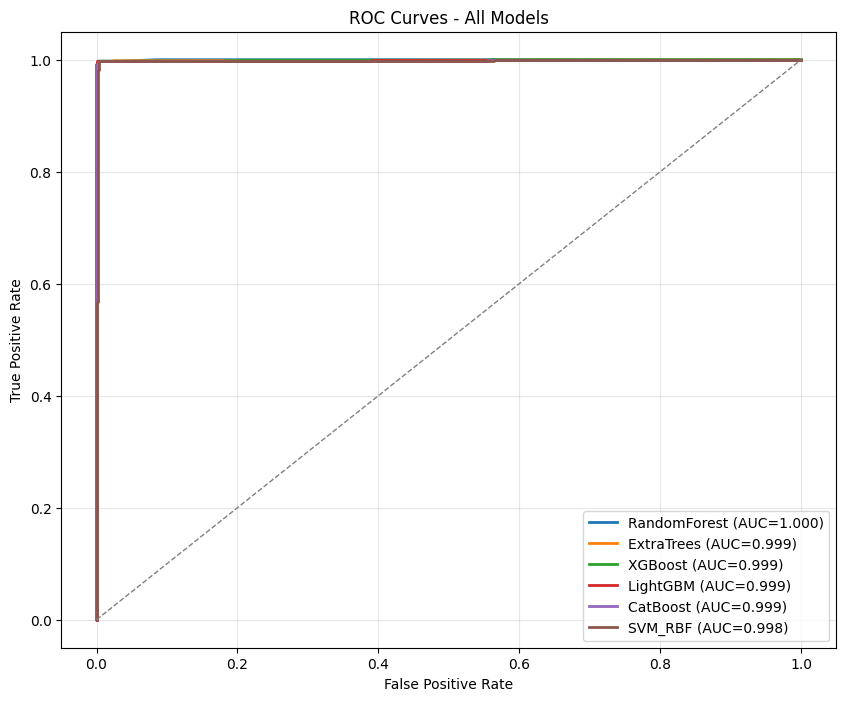

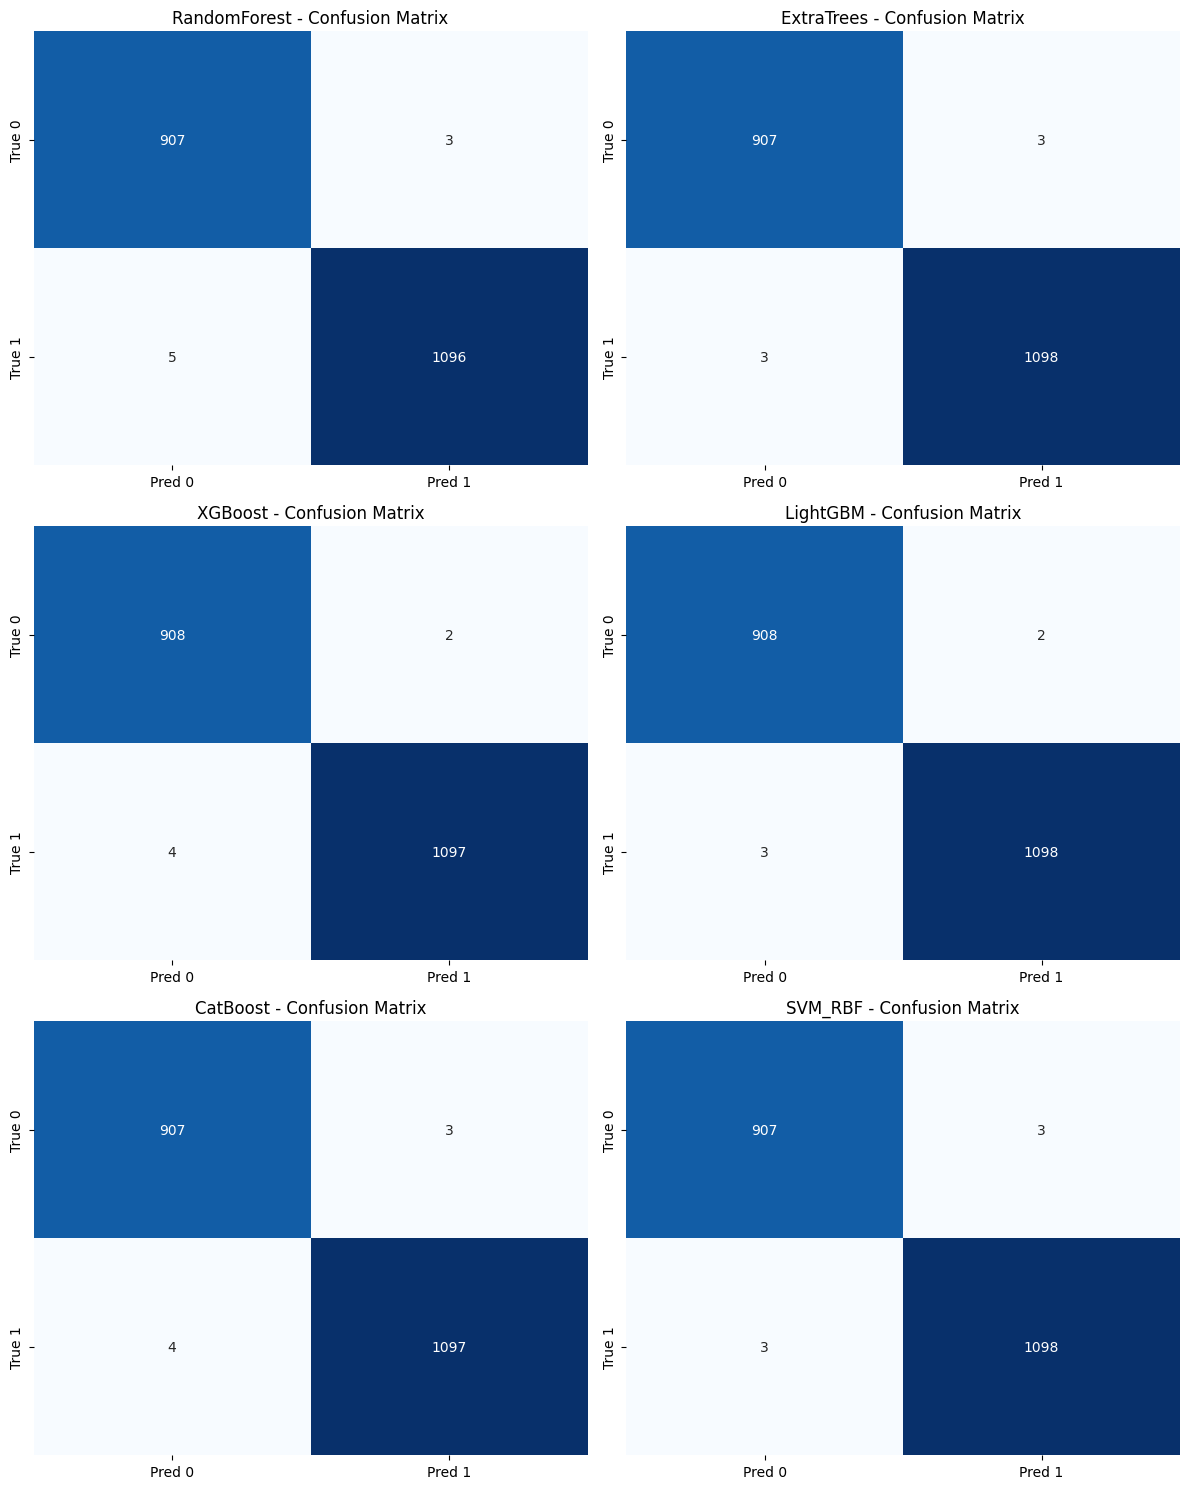


✅ Best model selected (priority ROC_AUC -> Accuracy -> Precision): RandomForest
Best model metrics:
Accuracy       0.9960
Precision      0.9973
Recall         0.9955
Sensitivity    0.9955
Specificity    0.9967
F1             0.9964
ROC_AUC        0.9998
Name: RandomForest, dtype: float64

Saved model performance summary to 'model_performance_summary.csv'


In [14]:
# Full Evaluation Pipeline: ensembles (2), boosting (3), kernel (1)
# Requires: pandas, numpy, scikit-learn, xgboost, lightgbm, catboost, matplotlib, seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve, auc)

# Models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

# Try to import boosters; fallback to sklearn's GradientBoosting if missing
try:
    from xgboost import XGBClassifier
    xgb_available = True
except Exception:
    from sklearn.ensemble import GradientBoostingClassifier
    xgb_available = False

try:
    from lightgbm import LGBMClassifier
    lgb_available = True
except Exception:
    lgb_available = False

try:
    from catboost import CatBoostClassifier
    cat_available = True
except Exception:
    cat_available = False

# ---------------------------
# --- 0) ASSUMPTION: df loaded
# ---------------------------
# df must be a pandas DataFrame and must include a column named 'Label' (Benign/Attack or similar).
# If your label column is named differently, change the 'label_col' variable below.

label_col = 'Label'         # <-- change if your label column has a different name
df_original = df.copy()     # keep a copy if needed

# ---------------------------
# 1) Keep only numeric features + label
# ---------------------------
numeric_df = df.select_dtypes(include=['number']).copy()
# If label is non-numeric, append it from original df
if df[label_col].dtype == 'object' or not np.issubdtype(df[label_col].dtype, np.number):
    numeric_df[label_col] = df[label_col].values
else:
    # label already numeric and present in numeric_df
    if label_col not in numeric_df.columns:
        numeric_df[label_col] = df[label_col].values

# ---------------------------
# 2) Encode label (binary)
# ---------------------------
le = LabelEncoder()
numeric_df[label_col] = le.fit_transform(numeric_df[label_col])   # e.g., Benign->0, Attack->1

# ---------------------------
# 3) Correlation-based feature reduction
#    Drop one of any pair with |corr| > threshold (0.95)
# ---------------------------
corr_threshold = 0.95
corr_matrix = numeric_df.drop(columns=[label_col]).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > corr_threshold)]
print(f"Correlation threshold: {corr_threshold}. Dropping {len(to_drop)} features (examples): {to_drop[:10]}")

df_reduced = numeric_df.drop(columns=to_drop)

# ---------------------------
# 4) Split features / target and Train-Test split (stratified)
# ---------------------------
X = df_reduced.drop(columns=[label_col])
y = df_reduced[label_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# ---------------------------
# 5) Scaling (StandardScaler)
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 6) Define models (2 ensembles, 3 boosting, 1 kernel-based)
# ---------------------------
models = {}

# 2 Ensembles
models['RandomForest'] = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
models['ExtraTrees']   = ExtraTreesClassifier(n_estimators=200, random_state=42, n_jobs=-1)

# 3 Boosting (use available ones, fallback if not installed)
if xgb_available:
    models['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=300, random_state=42, n_jobs=-1)
else:
    print("XGBoost not available — using sklearn.GradientBoosting as fallback")
    models['XGBoost'] = GradientBoostingClassifier(n_estimators=300, random_state=42)

if lgb_available:
    models['LightGBM'] = LGBMClassifier(n_estimators=300, random_state=42, n_jobs=-1)
else:
    print("LightGBM not available — using sklearn.GradientBoosting as fallback")
    models['LightGBM'] = GradientBoostingClassifier(n_estimators=300, random_state=42)

if cat_available:
    models['CatBoost'] = CatBoostClassifier(verbose=0, random_state=42)
else:
    print("CatBoost not available — using sklearn.GradientBoosting as fallback")
    models['CatBoost'] = GradientBoostingClassifier(n_estimators=300, random_state=42)

# 1 kernel-based
models['SVM_RBF'] = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)

# ---------------------------
# 7) Train, predict, compute metrics for each model
# ---------------------------
results = {}
roc_curves = {}   # store fpr,tpr,auc for plotting
confusion_matrices = {}

for name, clf in models.items():
    print(f"\nTraining {name} ...")
    # use scaled data for all models (SVM needs scaling; tree-based don't care but it's fine)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    # get probability scores for ROC-AUC
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test_scaled)[:, 1]
    else:
        # decision_function fallback
        try:
            y_proba = clf.decision_function(X_test_scaled)
            # decision_function might be shape (n,) for binary
        except Exception:
            # if for some reason neither exists, fallback to predictions (not ideal)
            y_proba = y_pred

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)        # same as sensitivity
    f1 = f1_score(y_test, y_pred, zero_division=0)
    try:
        roc_auc = roc_auc_score(y_test, y_proba)
    except Exception:
        roc_auc = np.nan

    # Confusion matrix -> tn, fp, fn, tp
    cm = confusion_matrix(y_test, y_pred)
    if cm.size == 4:
        tn, fp, fn, tp = cm.ravel()
    else:
        # if shape unexpected, set zeros
        tn = fp = fn = tp = 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'F1': f1,
        'ROC_AUC': roc_auc
    }

    confusion_matrices[name] = cm

    # ROC curve values
    try:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr, auc(fpr, tpr))
    except Exception:
        roc_curves[name] = (None, None, np.nan)

# ---------------------------
# 8) Results DataFrame & display sorted by ROC_AUC -> Accuracy -> Precision
# ---------------------------
results_df = pd.DataFrame(results).T
results_df_sorted = results_df.sort_values(by=['ROC_AUC', 'Accuracy', 'Precision'], ascending=False)
print("\n\n=== Model performance (unsorted) ===")
print(results_df.round(4))
print("\n\n=== Model performance (sorted by ROC_AUC -> Accuracy -> Precision) ===")
print(results_df_sorted.round(4))

# ---------------------------
# 9) Plot ROC curves for all models
# ---------------------------
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, a) in roc_curves.items():
    if fpr is None:
        continue
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={a:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - All Models")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# ---------------------------
# 10) Plot confusion matrices for all models (heatmaps)
# ---------------------------
n_models = len(confusion_matrices)
cols = 2
rows = int(np.ceil(n_models / cols))
plt.figure(figsize=(12, 5 * rows))

i = 1
for name, cm in confusion_matrices.items():
    plt.subplot(rows, cols, i)
    if cm.size == 4:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Pred 0', 'Pred 1'],
                    yticklabels=['True 0', 'True 1'])
    else:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    i += 1
plt.tight_layout()
plt.show()

# ---------------------------
# 11) Select best model using tie-breaker: ROC_AUC -> Accuracy -> Precision
# ---------------------------
# some models may have ROC_AUC NaN; handle by replacing NaN with -inf to avoid being chosen
ranking_df = results_df.copy()
ranking_df['ROC_AUC_fill'] = ranking_df['ROC_AUC'].fillna(-np.inf)
ranking_df_sorted = ranking_df.sort_values(by=['ROC_AUC_fill', 'Accuracy', 'Precision'], ascending=False)
best_name = ranking_df_sorted.index[0]
print(f"\n✅ Best model selected (priority ROC_AUC -> Accuracy -> Precision): {best_name}")
print("Best model metrics:")
print(results_df.loc[best_name].round(4))

best_model = models[best_name]

# ---------------------------
# 12) (Optional) Save summary to CSV
# ---------------------------
results_df.to_csv("model_performance_summary.csv")
print("\nSaved model performance summary to 'model_performance_summary.csv'")

# ---------------------------
# End of script
# ---------------------------


In [20]:
# /*************  ✨ Windsurf Command ⭐  *************/
# SHAP for LightGBM

model_type = type(best_model).__name__

if model_type == 'LGBMClassifier' or model_type == 'LGBMRegressor':
    explainer = shap.LightGBMExplainer(best_model, X_train_scaled, model_output='raw')
    shap_values = explainer.shap_values(X_train_scaled)
    
    # Summary plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_train_scaled, feature_names=X_train.columns, show=False)
    plt.title("SHAP Summary Plot")
    plt.tight_layout()
    plt.show()
    
    # Bar plot
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_train_scaled, feature_names=X_train.columns, plot_type="bar", show=False)
    plt.title("SHAP Feature Importance")
    plt.tight_layout()
    plt.show()
# /*******  4ccf7839-8610-46aa-bfac-09d1344b2ddc  *******/


Top 10 Features by SHAP Importance:
Bwd PSH Flags: 0.06650
Fwd PSH Flags: 0.06650
Flow Bytes/s: 0.05280
Flow Packets/s: 0.05280
Bwd Packets/s: 0.04951
Packet Length Max: 0.04951
Fwd Packet Length Std: 0.03041
Fwd Packet Length Min: 0.03041
Protocol: 0.03002
Flow Duration: 0.03002


<Figure size 1200x800 with 0 Axes>

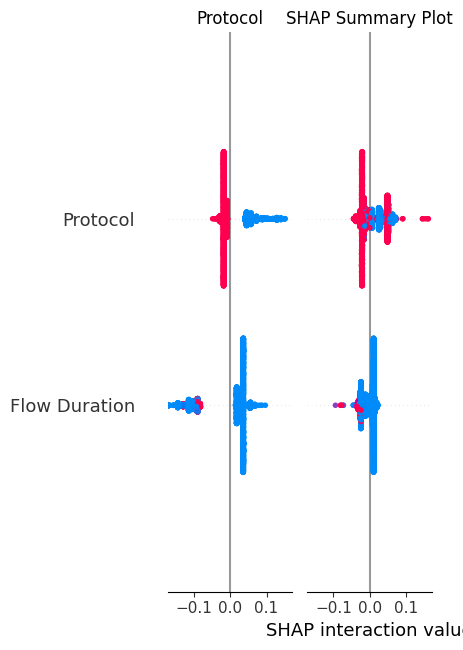

<Figure size 1000x600 with 0 Axes>

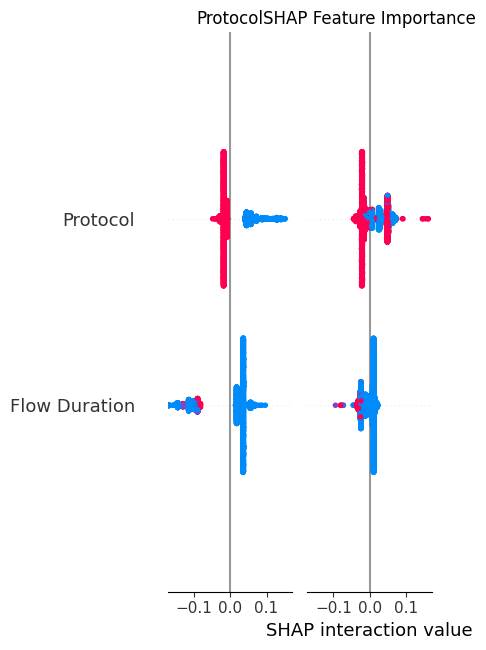

In [15]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Determine the model type to choose the right explainer
model_type = type(best_model).__name__

# For tree-based models
if model_type in ['RandomForestClassifier', 'RandomForestRegressor', 
                 'XGBClassifier', 'XGBRegressor', 'LGBMClassifier', 'LGBMRegressor',
                 'DecisionTreeClassifier', 'DecisionTreeRegressor',
                 'ExtraTreesClassifier', 'ExtraTreesRegressor',
                 'CatBoostClassifier', 'CatBoostRegressor']:
    
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_train_scaled)
    
    # Handle different output formats
    if isinstance(shap_values, list):
        if len(shap_values) == 2:  # Binary classification
            shap_values = shap_values[1]  # Use positive class
        else:  # Multi-class classification
            # For multi-class, we'll use the mean absolute SHAP across all classes
            shap_values = np.array(shap_values)
            shap_values = np.mean(np.abs(shap_values), axis=0)
    
# For non-tree models
else:
    # Use a smaller background sample for efficiency
    background = shap.sample(X_train_scaled, 100) if len(X_train_scaled) > 100 else X_train_scaled
    explainer = shap.KernelExplainer(best_model.predict_proba, background)
    shap_values = explainer.shap_values(X_train_scaled[:200])  # Use subset for efficiency
    
    if isinstance(shap_values, list):
        if len(shap_values) == 2:  # Binary classification
            shap_values = shap_values[1]  # Use positive class
        else:  # Multi-class classification
            shap_values = np.array(shap_values)
            shap_values = np.mean(np.abs(shap_values), axis=0)

# Ensure shap_values is 2D array for consistency
if len(shap_values.shape) == 1:
    shap_values = shap_values.reshape(1, -1)

# Calculate feature importance - ensure it's a 1D array
feature_importance = np.abs(shap_values).mean(axis=0)

# Flatten to ensure 1D array
feature_importance = feature_importance.flatten()

# Make sure we have the right number of features
if len(feature_importance) != len(X_train.columns):
    print(f"Warning: Number of features ({len(X_train.columns)}) doesn't match SHAP values ({len(feature_importance)})")
    # Use the minimum of both
    min_length = min(len(feature_importance), len(X_train.columns))
    feature_importance = feature_importance[:min_length]
    feature_names = X_train.columns[:min_length]
else:
    feature_names = X_train.columns

# Sort features by importance
sorted_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)

# Display top 10 features
print("\nTop 10 Features by SHAP Importance:")
for feature, importance in sorted_features[:10]:
    print(f"{feature}: {importance:.5f}")

# --- Create SHAP plots ---
try:
    # Summary plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_train_scaled, feature_names=X_train.columns, show=False)
    plt.title("SHAP Summary Plot")
    plt.tight_layout()
    plt.show()

    # Bar plot
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_train_scaled, feature_names=X_train.columns, plot_type="bar", show=False)
    plt.title("SHAP Feature Importance")
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Could not create plots: {e}")

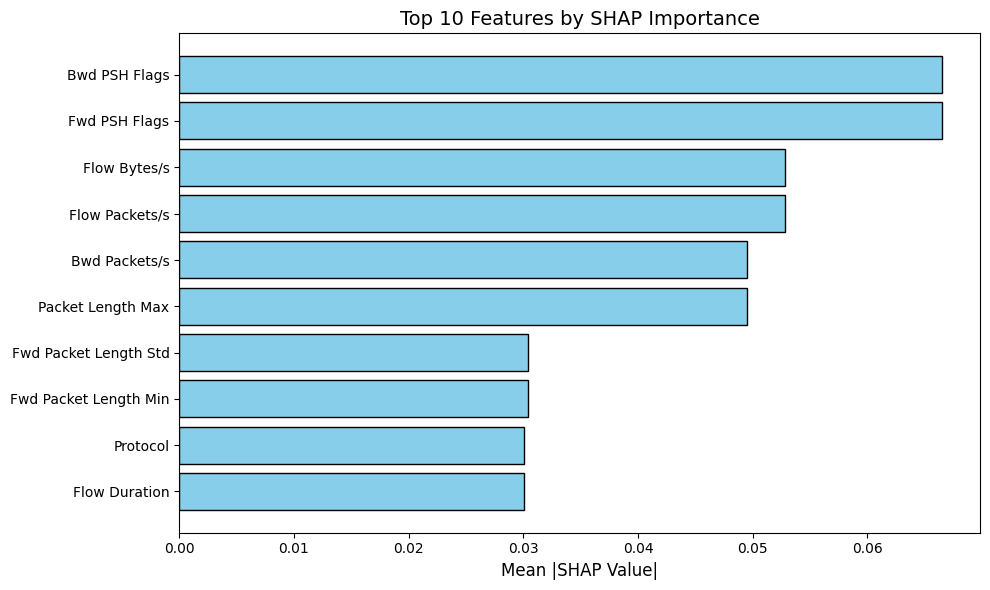

In [16]:
import matplotlib.pyplot as plt

# Take top 10
top_features = sorted_features[:10]
features = [f[0] for f in top_features]
importances = [f[1] for f in top_features]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features[::-1], importances[::-1], color="skyblue", edgecolor="black")
plt.xlabel("Mean |SHAP Value|", fontsize=12)
plt.title("Top 10 Features by SHAP Importance", fontsize=14)
plt.tight_layout()
plt.show()


In [17]:
import joblib

# Persist the best model to disk
joblib.dump(best_model, "best_model.pkl")
print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'


In [18]:
import time
import pandas as pd
from tabulate import tabulate

model_times = {}

print("Training models and measuring time...")
for name, clf in models.items():
    start_time = time.time()
    clf.fit(X_train_scaled, y_train)
    elapsed = time.time() - start_time
    model_times[name] = elapsed
    print(f"{name}: {elapsed:.4f} seconds")

# Create DataFrame
times_df = pd.DataFrame.from_dict(model_times, orient='index', columns=['Training Time (s)'])
times_df_sorted = times_df.sort_values('Training Time (s)')

# Display with pandas styling for better presentation
print("\n" + "="*50)
print("MODEL TRAINING TIMES")
print("="*50)
styled_df = times_df_sorted.style.format({'Training Time (s)': '{:.4f}'})\
                                  .set_caption('Training Times by Model (sorted by fastest)')\
                                  .set_properties(**{'text-align': 'center'})\
                                  .highlight_min(subset=['Training Time (s)'], color='lightgreen')\
                                  .highlight_max(subset=['Training Time (s)'], color='lightcoral')

display(styled_df)  # This works in Jupyter notebooks

# Alternative: Using tabulate for clean console output
print("\nTraining Times (Formatted Table):")
print(tabulate(times_df_sorted.reset_index().rename(columns={'index': 'Model'}), 
               headers='keys', 
               tablefmt='grid', 
               floatfmt=".4f",
               showindex=False))

# If you want to save to CSV
times_df_sorted.to_csv('model_training_times.csv')
print(f"\nResults saved to 'model_training_times.csv'")

Training models and measuring time...
RandomForest: 0.8861 seconds
ExtraTrees: 0.6777 seconds
XGBoost: 0.8134 seconds
[LightGBM] [Info] Number of positive: 2568, number of negative: 2124
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6440
[LightGBM] [Info] Number of data points in the train set: 4692, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547315 -> initscore=0.189826
[LightGBM] [Info] Start training from score 0.189826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

,Training Time (s)
ExtraTrees,0.6777
XGBoost,0.8134
RandomForest,0.8861
SVM_RBF,1.5739
LightGBM,2.0964
CatBoost,24.4722



Training Times (Formatted Table):
+--------------+---------------------+
| Model        |   Training Time (s) |
+==============+=====================+
| ExtraTrees   |              0.6777 |
+--------------+---------------------+
| XGBoost      |              0.8134 |
+--------------+---------------------+
| RandomForest |              0.8861 |
+--------------+---------------------+
| SVM_RBF      |              1.5739 |
+--------------+---------------------+
| LightGBM     |              2.0964 |
+--------------+---------------------+
| CatBoost     |             24.4722 |
+--------------+---------------------+

Results saved to 'model_training_times.csv'


Correlation threshold: 0.95. Dropping 21 features (examples): ['Bwd Packets Length Total', 'Fwd Packet Length Mean', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Fwd Packets/s', 'Packet Length Min', 'Packet Length Mean', 'RST Flag Count']

Training RandomForest ...

Training ExtraTrees ...

Training XGBoost ...

Training LightGBM ...
[LightGBM] [Info] Number of positive: 2568, number of negative: 2124
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6440
[LightGBM] [Info] Number of data points in the train set: 4692, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547315 -> initscore=0.189826
[LightGBM] [Info] Start training from score 0.189826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

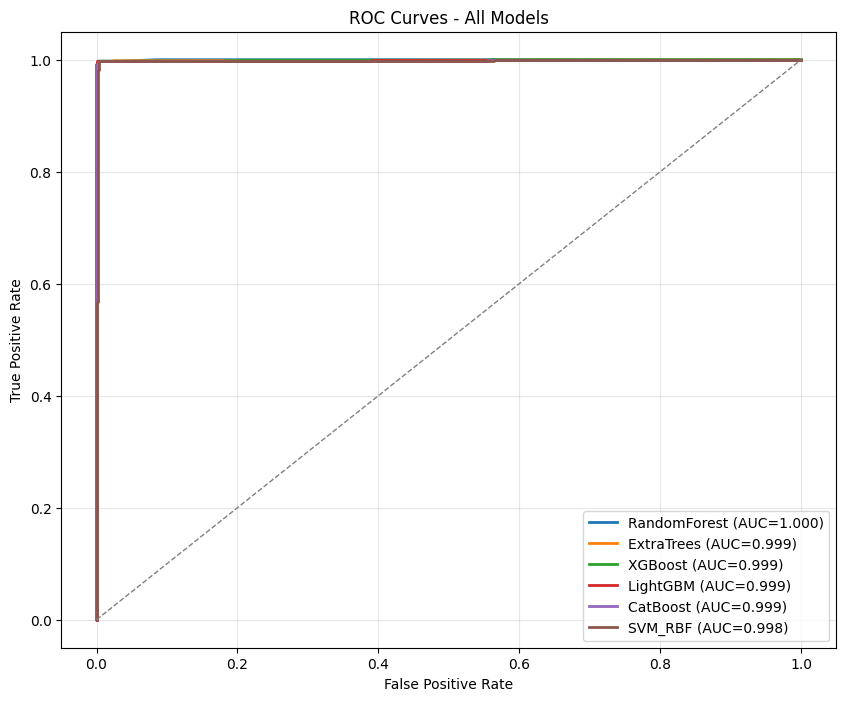

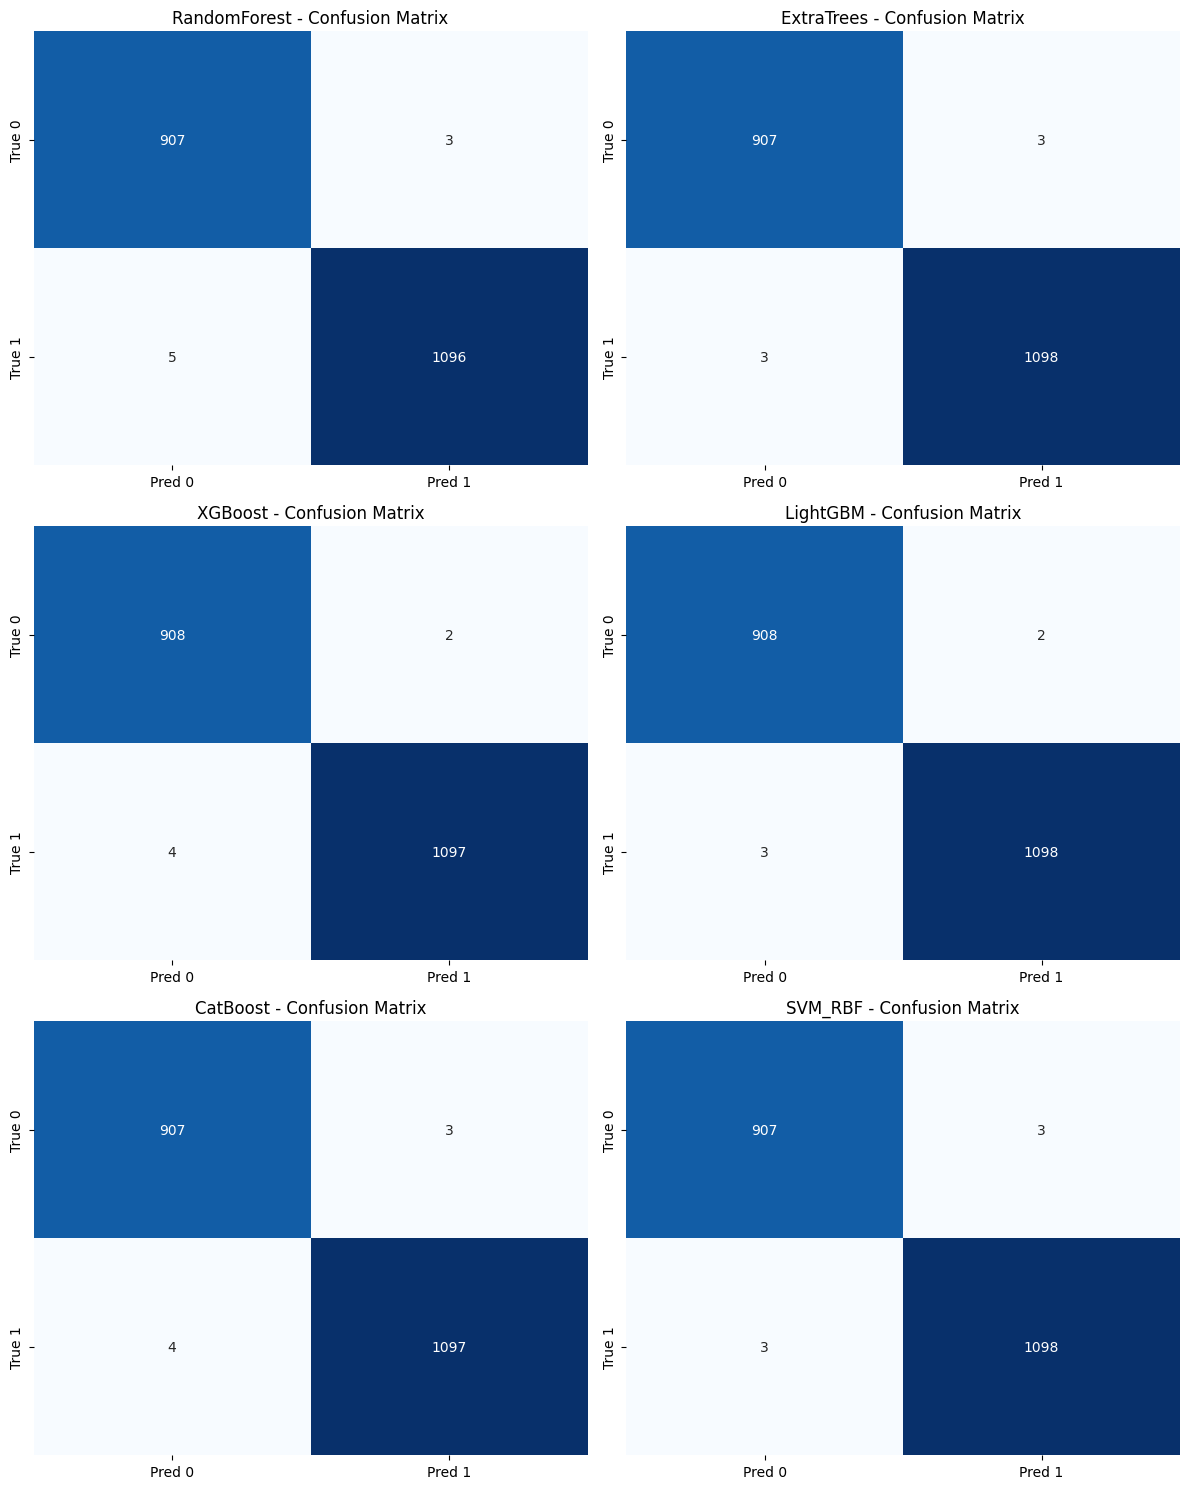


=== Metric Wins per Model ===
LightGBM        6
ExtraTrees      2
SVM_RBF         2
XGBoost         1
RandomForest    1
dtype: int64

✅ Final Best Model: LightGBM
Best model metrics:
Accuracy       0.9975
Precision      0.9982
Recall         0.9973
Sensitivity    0.9973
Specificity    0.9978
F1             0.9977
ROC_AUC        0.9992
Name: LightGBM, dtype: float64

Saved model performance summary to 'model_performance_summary.csv'


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve, auc)

# Models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

# Try to import boosters; fallback to sklearn's GradientBoosting if missing
try:
    from xgboost import XGBClassifier
    xgb_available = True
except Exception:
    from sklearn.ensemble import GradientBoostingClassifier
    xgb_available = False

try:
    from lightgbm import LGBMClassifier
    lgb_available = True
except Exception:
    lgb_available = False

try:
    from catboost import CatBoostClassifier
    cat_available = True
except Exception:
    cat_available = False

# ---------------------------
# 0) ASSUMPTION: df loaded
# ---------------------------
label_col = 'Label'         # <-- change if your label column has a different name
df_original = df.copy()

# ---------------------------
# 1) Keep only numeric features + label
# ---------------------------
numeric_df = df.select_dtypes(include=['number']).copy()
if df[label_col].dtype == 'object' or not np.issubdtype(df[label_col].dtype, np.number):
    numeric_df[label_col] = df[label_col].values
else:
    if label_col not in numeric_df.columns:
        numeric_df[label_col] = df[label_col].values

# ---------------------------
# 2) Encode label (binary)
# ---------------------------
le = LabelEncoder()
numeric_df[label_col] = le.fit_transform(numeric_df[label_col])

# ---------------------------
# 3) Correlation-based feature reduction
# ---------------------------
corr_threshold = 0.95
corr_matrix = numeric_df.drop(columns=[label_col]).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > corr_threshold)]
print(f"Correlation threshold: {corr_threshold}. Dropping {len(to_drop)} features (examples): {to_drop[:10]}")

df_reduced = numeric_df.drop(columns=to_drop)

# ---------------------------
# 4) Train-Test split
# ---------------------------
X = df_reduced.drop(columns=[label_col])
y = df_reduced[label_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# ---------------------------
# 5) Scaling
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 6) Define models
# ---------------------------
models = {}

models['RandomForest'] = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
models['ExtraTrees']   = ExtraTreesClassifier(n_estimators=200, random_state=42, n_jobs=-1)

if xgb_available:
    models['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=300, random_state=42, n_jobs=-1)
else:
    print("XGBoost not available — using sklearn.GradientBoosting as fallback")
    models['XGBoost'] = GradientBoostingClassifier(n_estimators=300, random_state=42)

if lgb_available:
    models['LightGBM'] = LGBMClassifier(n_estimators=300, random_state=42, n_jobs=-1)
else:
    print("LightGBM not available — using sklearn.GradientBoosting as fallback")
    models['LightGBM'] = GradientBoostingClassifier(n_estimators=300, random_state=42)

if cat_available:
    models['CatBoost'] = CatBoostClassifier(verbose=0, random_state=42)
else:
    print("CatBoost not available — using sklearn.GradientBoosting as fallback")
    models['CatBoost'] = GradientBoostingClassifier(n_estimators=300, random_state=42)

models['SVM_RBF'] = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)

# ---------------------------
# 7) Train, predict, compute metrics
# ---------------------------
results = {}
roc_curves = {}
confusion_matrices = {}

for name, clf in models.items():
    print(f"\nTraining {name} ...")
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test_scaled)[:, 1]
    else:
        try:
            y_proba = clf.decision_function(X_test_scaled)
        except Exception:
            y_proba = y_pred

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    try:
        roc_auc = roc_auc_score(y_test, y_proba)
    except Exception:
        roc_auc = np.nan

    cm = confusion_matrix(y_test, y_pred)
    if cm.size == 4:
        tn, fp, fn, tp = cm.ravel()
    else:
        tn = fp = fn = tp = 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'F1': f1,
        'ROC_AUC': roc_auc
    }

    confusion_matrices[name] = cm

    try:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr, auc(fpr, tpr))
    except Exception:
        roc_curves[name] = (None, None, np.nan)

# ---------------------------
# 8) Results DataFrame
# ---------------------------
results_df = pd.DataFrame(results).T
print("\n\n=== Model performance ===")
print(results_df.round(4))

# ---------------------------
# 9) Plot ROC curves
# ---------------------------
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, a) in roc_curves.items():
    if fpr is None:
        continue
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={a:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - All Models")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# ---------------------------
# 10) Confusion Matrices
# ---------------------------
n_models = len(confusion_matrices)
cols = 2
rows = int(np.ceil(n_models / cols))
plt.figure(figsize=(12, 5 * rows))

i = 1
for name, cm in confusion_matrices.items():
    plt.subplot(rows, cols, i)
    if cm.size == 4:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Pred 0', 'Pred 1'],
                    yticklabels=['True 0', 'True 1'])
    else:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    i += 1
plt.tight_layout()
plt.show()

# ---------------------------
# 11) Best Model Selection
# ---------------------------
# Count metric leads
metric_winners = {}
for metric in results_df.columns:
    best_models = results_df[results_df[metric] == results_df[metric].max()].index
    for m in best_models:
        metric_winners[m] = metric_winners.get(m, 0) + 1

metric_winners = pd.Series(metric_winners).sort_values(ascending=False)
print("\n=== Metric Wins per Model ===")
print(metric_winners)

# Priority ranking fallback
ranking_df = results_df.copy()
ranking_df['ROC_AUC_fill'] = ranking_df['ROC_AUC'].fillna(-np.inf)
ranking_df_sorted = ranking_df.sort_values(by=['ROC_AUC_fill', 'Accuracy', 'Precision'], ascending=False)

if len(metric_winners) > 1 and metric_winners.iloc[0] == metric_winners.iloc[1]:
    print("\nTie detected, using priority ranking (ROC_AUC -> Accuracy -> Precision)...")
    best_name = ranking_df_sorted.index[0]
else:
    best_name = metric_winners.index[0]

print(f"\n✅ Final Best Model: {best_name}")
print("Best model metrics:")
print(results_df.loc[best_name].round(4))

best_model = models[best_name]

# ---------------------------
# 12) Save summary
# ---------------------------
results_df.to_csv("model_performance_summary.csv")
print("\nSaved model performance summary to 'model_performance_summary.csv'")


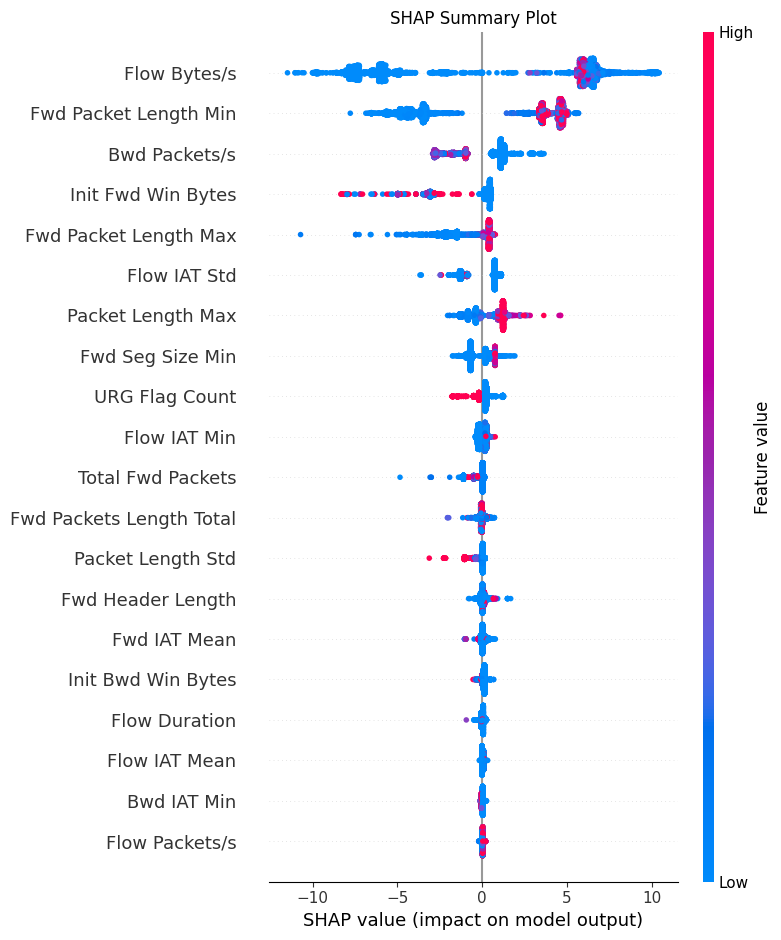

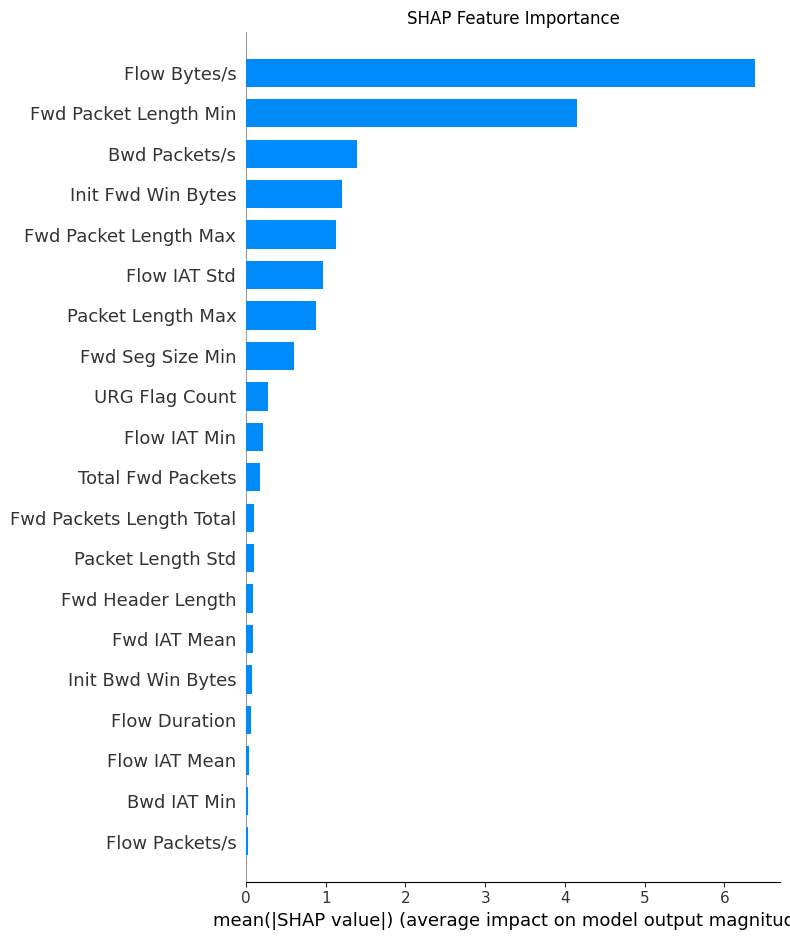

In [22]:
# /*************  ✨ Windsurf Command ⭐  *************/
# ---------------------------
# 13) SHAP for Best Model
# ---------------------------
# SHAP for best model
import shap

shap.initjs()

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train_scaled)

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_train_scaled, feature_names=X_train.columns, show=False)
plt.title("SHAP Summary Plot")
plt.tight_layout()
plt.show()

# Bar plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train_scaled, feature_names=X_train.columns, plot_type="bar", show=False)
plt.title("SHAP Feature Importance")
plt.tight_layout()
plt.show()
# /*******  a27072fb-a21a-41a0-88fd-5108c81a2a63  *******/

In [23]:
# /*************  ✨ Windsurf Command ⭐  *************/
# Persist the top 3 models to disk
top_3_names = results_df_sorted.index[:3].tolist()
top_3_models = [models[name] for name in top_3_names]
for i, (name, model) in enumerate(zip(top_3_names, top_3_models)):
    joblib.dump(model, f"{name}.pkl")
    print(f"Saved top 3 model '{name}' to disk ({i+1} of {len(top_3_models)})")
# /*******  d6350206-f47c-47c3-83b3-1e50c18ee8c2  *******/

Saved top 3 model 'RandomForest' to disk (1 of 3)
Saved top 3 model 'LightGBM' to disk (2 of 3)
Saved top 3 model 'XGBoost' to disk (3 of 3)
